# Application Objectives:
    - Find what the user is looking for  
    - Locat places that are green <- that provides those serveces
    - Show locations on map
    
    API Info Pages:
    
    Geocoding API Documentaion- "https://developers.google.com/maps/documentation/geocoding/overview?hl=en_US#top_of_page"
    
    Places API Documentation- "https://developers.google.com/places/web-service/overview?hl=en_US"

In [7]:
import requests #used to interact wiht API
from IPython.display import IFrame
from urllib.parse import urlencode, urlparse, parse_qsl
GOOGLE_API_KEY = "ABCS" #<-- Fake Key

class GoogleMapsAPI(object):
    lat = None
    lng = None
    data_type = 'json'
    location_query = None 
    api_key =  None
    place_id = None
    
    def __init__(self, api_key = None, address_or_postal_code = None, *args, **kwargs):
        super().__init__(*args,**kwargs)
        if api_key == None:
            raise Exception("Needs APi") 
        self.api_key = api_key 
        self.location_query = address_or_postal_code
        if self.location_query != None:
            self.extract_lat_lng()
    
    def extract_lat_lng(self, location = None):
        loc_query = self.location_query
        if location != None:
            loc_query = location
        endpoint = f"https://maps.googleapis.com/maps/api/geocode/{self.data_type}" #<use of endpoint 
        params = {"address": loc_query, "key": self.api_key}#< dictionary for params contains address and key
        url_params = urlencode(params)#< encodes input or address into a url acceptable param
        url = f"{endpoint}?{url_params}"
        r = requests.get(url)
        if r.status_code not in range(200,299):#<-- This is so if there are no searches found
            return {}
        else:
            lat_lng = {}
        try:
            lat_lng = r.json()['results'][0]['geometry']['location'] #<-- saves the lat and long into dic from request dict
        except:#<-- error controle
            pass
        self.lat = lat_lng.get('lat')
        self.lng = lat_lng.get('lng') #<-- Shows tha lat in long
        return self.lat, self.lng
    
    
    def search(self, keyword = None, radius = 5000, location = None):
        lat, lng = self.lat, self.lng
        if location != None:
             lat,lng = self.extract_lat_lng(location = location)
        endpoint= f"https://maps.googleapis.com/maps/api/place/nearbysearch/{self.data_type}"#< NEAR BY EXAMPLE
        params = {
            "key": self.api_key,
            "location":f"{lat},{lng}",
            "radius": radius,
            "keyword": keyword   
        }
        encoded_params = urlencode(params)
        places_url = f'{endpoint}?{encoded_params}'
        r = requests.get(places_url)
        if r.status_code not in range(200,299):
            return {}
        else:
            return r.json()['results']
        
    def place_detail(self, place_id = None):
        detail_base_endpoint = "https://maps.googleapis.com/maps/api/place/details/json"
        detail_params = {
        "key" : self.api_key,
        "place_id": f"{place_id}",
        "fields" : "name,rating,formatted_phone_number,opening_hours,price_level" 
        }
        detail_encode = urlencode(detail_params)
        url_place_detail = f'{detail_base_endpoint}?{detail_encode}'
        r = requests.get(url_place_detail)
        if r.status_code not in range(200,299):
            return []
        else:
            return r.json()['result']
        
    def map_results(self, query = None, location = None):
        map_url = 'https://www.google.com/maps/embed/v1/'
        mode = 'search'
        params = {
            'key':self.api_key,
            'q':f'{query} around {location}',
            'center':f'{self.lat},{self.lng}',
            'zoom' : '10'
        }
        params_encode = urlencode(params)
        map_url = f'{map_url}{mode}?{params_encode}'
        return map_url 


##  Find what the user is looking for:
=> Get the user query examples are(vegan food or substainable supermarkets etc.)

=> Find out location of user and what area they want to view

In [10]:
#from GoogleMaps.py import GoogleMapsAPI

def Find_Place(results, query, location):
    print('Locations that provide',query,'in', location)
    count = 1
    for item in results:
        print("===== Location",count,"======")
        print('Place:',item['name'],'\nAddress: ', item['vicinity'], '\nRating: ', item['rating'],"\n")
        count += 1
        
def print_detail(place_id):
    results = user.place_detail(place_id)
    try:
        print('Location Name: ',results['name'],'\nPhone Number: ',results['formatted_phone_number'],'\nLocation Hours: ',results['opening_hours']['weekday_text'])
    except:
        print(results)
    #for item in results['opening_hours']:
        #print(item)
    
      

In [11]:

print("What are you looking for? (Examples vegan Food, Substaibale Super markets)")
query = input('Enter Here: ')
print('What the location?')
location = input("Enter General area or address?")
user = GoogleMapsAPI(GOOGLE_API_KEY, address_or_postal_code = location)
user.extract_lat_lng(location)
print(user.lat, user.lng)
Find_Place(user.search( keyword = query, radius = 5000, location = location), query, location)

What are you looking for? (Examples vegan Food, Substaibale Super markets)
Enter Here: vegan food
What the location?
Enter General area or address?baltimore
39.2903848 -76.6121893
Locations that provide vegan food in baltimore
===== Location 1 ======
Place: Liquid Earth 
Address:  1626 Aliceanna St, Baltimore 
Rating:  4.7 

===== Location 2 ======
Place: STEM: Farm + Kitchen 
Address:  301 W 29th St, Baltimore 
Rating:  4.3 

===== Location 3 ======
Place: sweetgreen 
Address:  1306 Fleet St, Baltimore 
Rating:  4.6 

===== Location 4 ======
Place: The Land of Kush 
Address:  840 N Eutaw St, Baltimore 
Rating:  4.4 

===== Location 5 ======
Place: Kerfuffle Foods 
Address:  2221 Morton St, Baltimore 
Rating:  3 

===== Location 6 ======
Place: Johnny Rad's Pizzeria Tavern 
Address:  2108 Eastern Ave, Baltimore 
Rating:  4.7 

===== Location 7 ======
Place: Gangster Vegan Organics 
Address:  1065 S Charles St, Baltimore 
Rating:  4.7 

===== Location 8 ======
Place: Refocused Vegan 
Ad

## Example Out Put
What are you looking for? (Examples vegan Food, Substaibale Super markets)
Enter Here: Vegan Food
What the location?
Enter General area or address?Baltimore
39.2903848 -76.6121893
Locations that provide Vegan Food in Baltimore

===== Location 1 ======
-Place: sweetgreen 
-Address:  1306 Fleet St, Baltimore 
-Rating:  4.6 

===== Location 2 ======
Place: STEM: Farm + Kitchen 
Address:  301 W 29th St, Baltimore 
Rating:  4.3 

===== Location 2 ======
Location Name:  STEM: Farm + Kitchen 
Phone Number:  (443) 681-1911 
Location Hours:  ['Monday: 12:00 – 8:00 PM', 'Tuesday: Closed', 'Wednesday: 12:00 – 8:00 PM', 'Thursday: 12:00 – 8:00 PM', 'Friday: 12:00 – 9:00 PM', 'Saturday: 12:00 – 9:00 PM', 'Sunday: 12:00 – 8:00 PM']

In [12]:
IFrame(user.map_results(query, location), width=700, height=350)

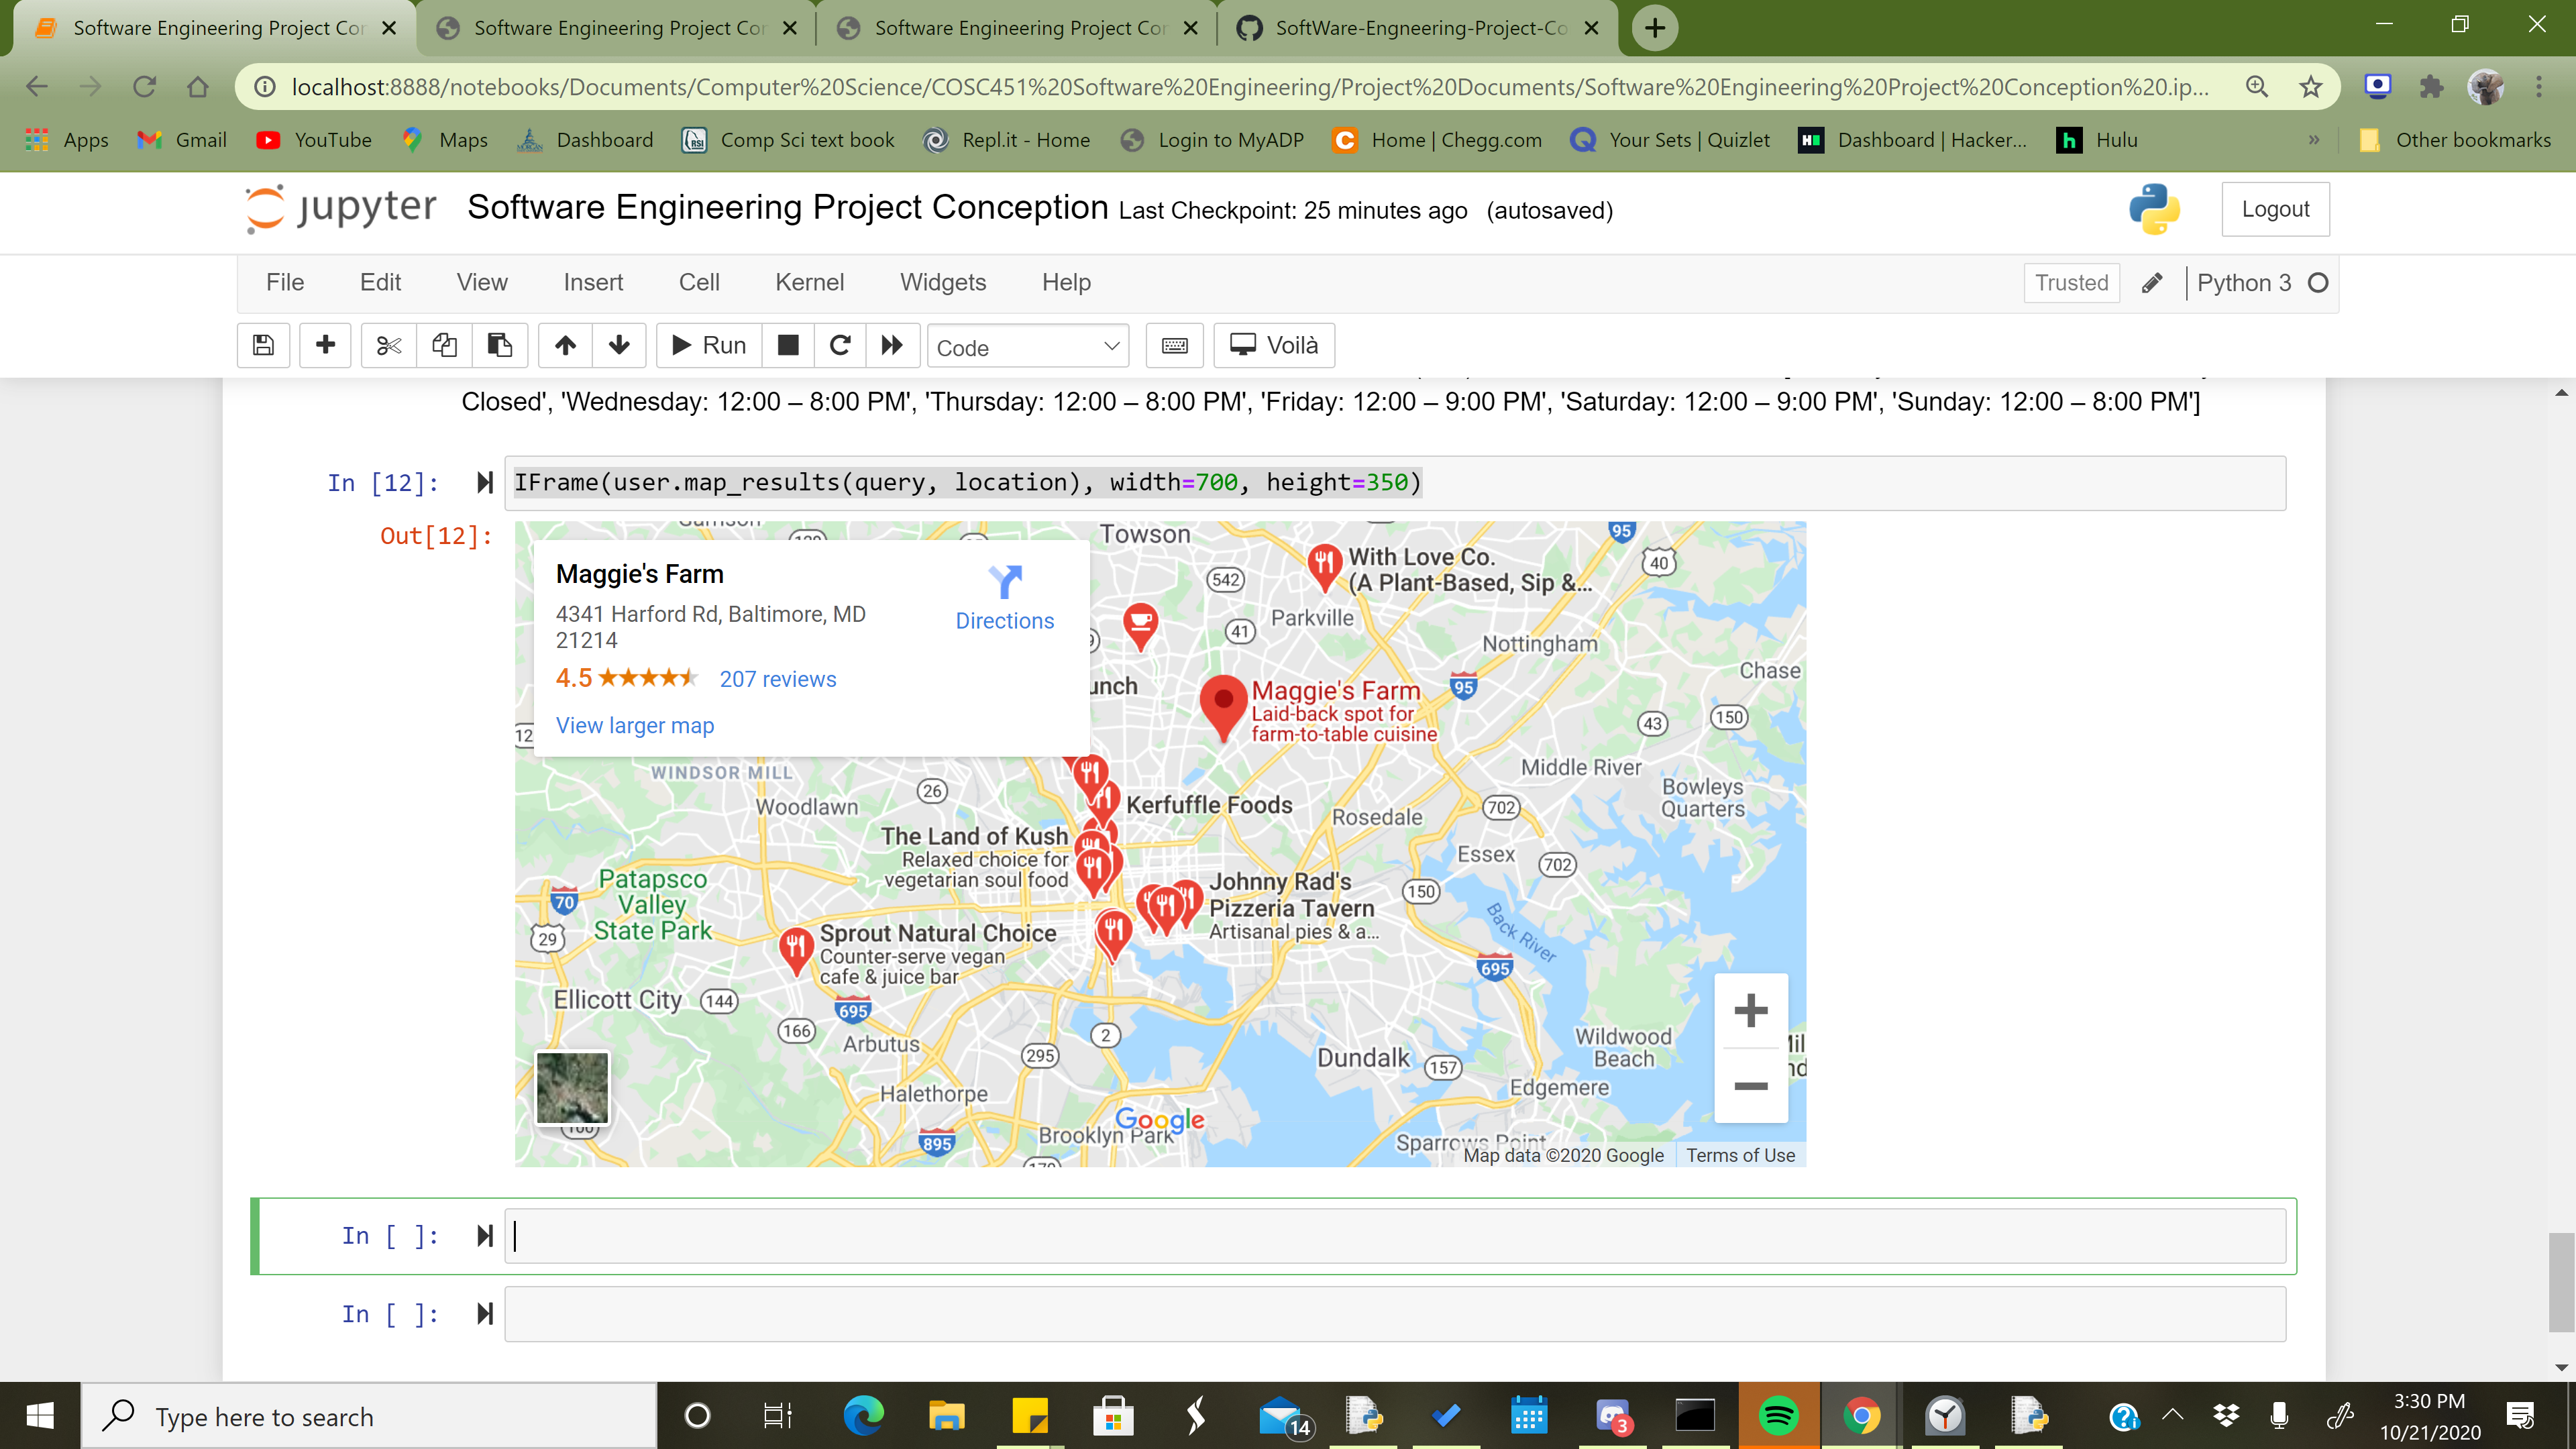 